In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
db = automap_base()
# reflect the tables
db.prepare(engine, reflect=True)


In [22]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
meas = db.classes.measurement
stat = db.classes.station

In [24]:
# Create our session (link) from Python to the DB
sess = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
last_date = sess.query(meas.date).order_by(meas.date.desc()).first()
last_date

('2017-08-23',)

In [26]:
# Calculate the date one year from the last date in data set.
minus_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f'One year before last date: {minus_year}')


One year before last date: 2016-08-23


In [27]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip = sess.query(meas.date, meas.prcp).\
    filter(meas.date >= minus_year).\
    order_by(meas.date).all()


In [28]:
# Perform a query to retrieve the data and precipitation scores
all_the_rain = sess.query(meas.date, meas.prcp).order_by(meas.date.desc()).all()

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#Sort the dataframe by date
rain_df = pd.DataFrame(precip,columns=['Date','Precipitation (in)'])
rain_df.set_index("Date", inplace=True)
rain_df.tail()

,Precipitation (in)
Date,
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


In [30]:
df2=rain_df.sort_values("Date", ascending=False)
df2.head()

,Precipitation (in)
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.50


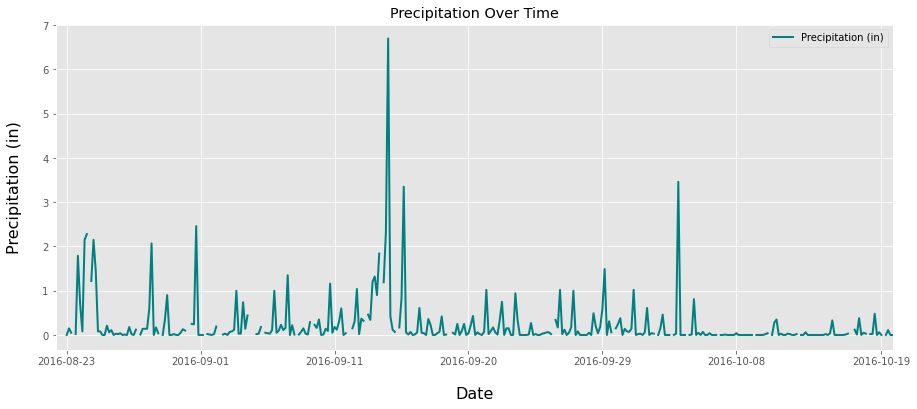

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
# create plot
plt.rcParams['figure.figsize']=(15,7)
rain_df.plot(title="Precipitation Over Time", xticks=(0,60,120,180,240,300,365), 
             figsize=(15,6), color = 'teal', linewidth = 2.0)

# fix axis, label, and save
plt.xlabel('Date',fontsize=16,color='black',labelpad=20 )
plt.ylabel('Precipitation (in)', fontsize=16,color='black',labelpad=20)
plt.xlim(-5,370)
plt.legend(loc='upper right')
plt.savefig("Images/precip.png")
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
s1 = sess.query(meas.station).distinct().count()
print(f'There are {s1} stations in the dataset.')

There are 9 stations in the dataset.


In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = sess.query(meas.station, func.count(meas.station)).\
group_by(meas.station).\
order_by(func.count(meas.station).desc()).all()
active_df = pd.DataFrame(most_active, columns=["Station ID","Observations"])
active_df.sort_values("Observations", ascending=False)
active_df.head()

,Station ID,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = select = [func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)]
min_max = sess.query(*select).\
    filter(meas.station == "USC00519281").all()
print(f'The Minimum, Maximum, and Average of the most active station\nare as follows: {min_max}')

The Minimum, Maximum, and Average of the most active station
are as follows: [(54.0, 85.0, 71.66378066378067)]


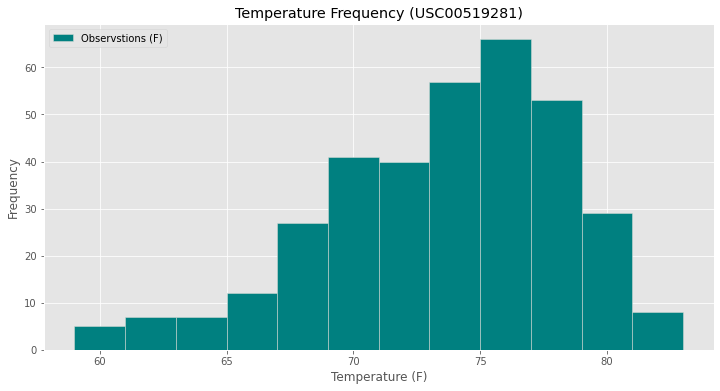

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = sess.query(meas.tobs).\
    filter(meas.date >= minus_year).\
    filter(meas.station == "USC00519281").\
    order_by(meas.date).all()

# save as a dataframe
temp_df = pd.DataFrame(temp_obs, columns=["Observstions (F)"])

# start graphing
temp_df.plot.hist(bins=12, title="Temperature Frequency (USC00519281)", 
                  figsize=(12,6),color = 'teal', edgecolor='xkcd:light gray')
plt.xlabel("Temperature (F)")
plt.legend(loc="upper left")
plt.savefig("Images/temp.png")
plt.show()

# Close session

In [41]:
# Close Session
sess.close()